In [1]:
import sys
sys.path.append('/Users/mariana/Documents/projects/Graphs/egnn')

In [2]:
from ae_datasets import d_selector, Dataloader
from ae_datasets.d_creator import max_n_nodes, DatasetCommunity, DatasetErdosRenyiNodes
import graph as gl

In [3]:
import networkx as nx

In [4]:
dataset_name = 'community_ours'

In [16]:
dataset = d_selector.retrieve_dataset(dataset_name, with_pos=False, n_nodes=13, directed=True)

Creating dataset with  2  communities


In [44]:
dataset = DatasetCommunity(n_samples=10, n_nodes=24)

Creating dataset with  2  communities


In [10]:
loader = Dataloader(dataset)

In [11]:
batch = next(iter(loader))

In [12]:
batch

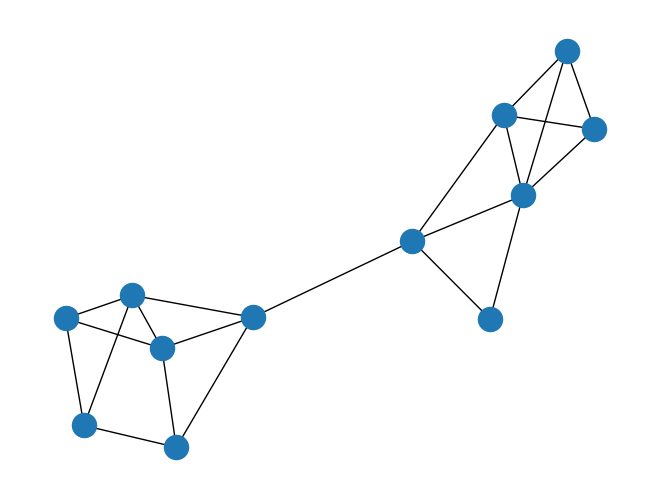

In [20]:
gl.plot_graph(dataset.graphs[0])

In [10]:
graph = dataset.graphs[0]
nodes, edges, edge_attr, adj_gt = graph.get_dense_graph(store=True, loops=False)

In [11]:
adj_gt

tensor([[0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.]])

In [13]:
graph_nx = gl.graph2networkx(graph)

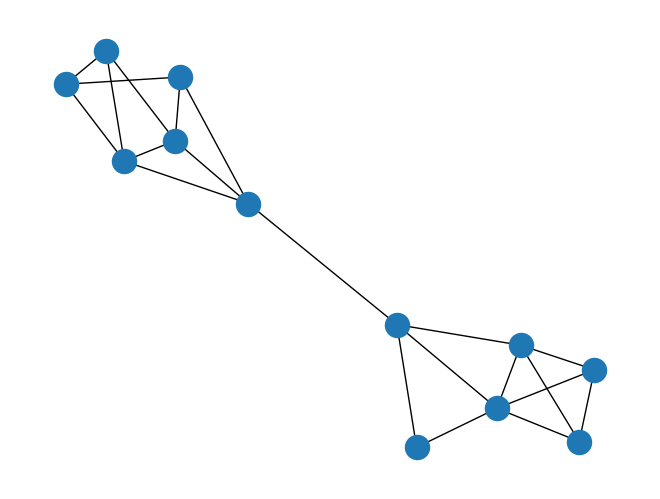

In [14]:
nx.draw(graph_nx, pos=nx.spring_layout(graph_nx, seed=10))

In [34]:
nx.spring_layout(graph_nx, seed=10)

{0: array([-0.2862229,  0.1454583]),
 3: array([-0.53886711,  0.50615563]),
 4: array([-0.55826922,  0.32480073]),
 5: array([-0.74741481,  0.26631776]),
 6: array([ 0.26580902, -0.19997699]),
 1: array([-0.81504401,  0.58144379]),
 2: array([-0.96547147,  0.48570698]),
 7: array([ 0.72570035, -0.2587336 ]),
 10: array([ 0.33909903, -0.55003494]),
 11: array([ 0.63747567, -0.43873639]),
 8: array([ 0.94320544, -0.5337241 ]),
 9: array([ 1.        , -0.32867717])}

In [36]:
dataset = DatasetErdosRenyiNodes(p=0.2, seed=10, partition='test', n_nodes=40)

In [37]:
dataset.seed

2

In [38]:
max_n_nodes(dataset.graphs)

40

In [8]:
for graph in dataset.graphs:
    print(max_n_nodes([graph]))

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
1